# HOUSING: PRICE PREDICTION
Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?
Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.
Technical Requirements:
• Data contains 1460 entries each having 81 variables.
• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
• Extensive EDA has to be performed to gain relationships of important variable and price.
• Data contains numerical as well as categorical variable. You need to handle them accordingly.
• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.
• You need to find important features which affect the price positively or negatively.
• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.
The “Data file.csv” and “Data description.txt” are enclosed with this file.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report


from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,mean_squared_error
from sklearn.preprocessing import scale
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.linear_model import LinearRegression
from sklearn import metrics




import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Housingtraindata.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [3]:
#Finding the shape of dataset
df.shape

(1168, 81)

It has 1168 no. of rows & 81 columns

In [4]:
#Finding info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [5]:
#it is a large dataset with object & integer datatye. Null Values are also present in this dataset.

In [6]:
#Seperating numerical & Categorical data

num_data=df.select_dtypes(include=[np.number])
cat_data=df.select_dtypes(exclude=[np.number])


print("Categorical columns \n",cat_data.columns)
print("\n Shape of Categorical columns \n", cat_data.shape)
print("\n Numerical columns \n",num_data.columns)
print("\n Shape of Numerical columns \n", num_data.shape)


Categorical columns 
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

 Shape of Categorical columns 
 (1168, 43)

 Numerical columns 
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrL

In [7]:
#Finding the null values
print("\n Missing Values in Numerical Data \n",num_data.isna().sum())
print("\n Missing Values in Numerical Data \n",cat_data.isna().sum())


 Missing Values in Numerical Data 
 Id                 0
MSSubClass         0
LotFrontage      214
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         7
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       64
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

 Missing Values in Numerical Data 
 MSZoning            0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utili

In [8]:
#In Numerical Column Foloowing Columns are having missing data:LotFrontage,MasVnrArea,GarageYrBlt
#In Categorical Columns missing values in : MiscFeature,Fence,PoolQC,GarageCond,GarageQual,GarageFinish,GarageType,FireplaceQu,BsmtFinType2,BsmtFinType1,
#BsmtExposure,BsmtCond,BsmtQual,MasVnrType,Alley


#Looking at some categorical columns like MiscFeature, PollQC, Alley,Fence having large nos. of null values hence it is better to dropthis columns.

In [9]:
#Dropping The large Null value columns
df=df.drop(["Alley","PoolQC", "MiscFeature","Fence"], axis=1)

In [10]:
df.shape

(1168, 77)

In [11]:
#After removal of columns the datshape becomes 1168 rows & 77 columns.

In [12]:
#Now Describing the dataset
df.describe().T

count           mean           std      min        25%  \
Id             1168.0     724.136130    416.159877      1.0     360.50   
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage     954.0      70.988470     24.828750     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1161.0     102.310078    182.595606      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1104.0    1978.193841     24.890704   1900.0    1961.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%       75%       max  
Id                714.5    1079.5    1460.0  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9522.5   11515.5  164660.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1972.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     160.0    1600.0  
BsmtFinSF1        385.5     714.5    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         474.0     816.0    2336.0  
TotalBsmtSF      1005.5    1291.5    6110.0  
1stFlrSF         1096.5    1392.0    4692.0  
2ndFlrSF            0.0     729.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1468.5    1795.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0  

-Total 1460 nos. IDs are present in dataset.
-MSSubClass: -Type of dwelling 20 to 190 diffrent types of dwelling are present.
-LotFrontage: Linear feet of street connected to property: Min 21, max 313 & mean 70. Outliers are seen on this dataset.
-LotArea: - Min area is 1300 sq.ft to max: 164666 sq. ft. MEan 10484 sq.ft. Outliers are seen on this column.
-OverallQual:-Rates the overall material and finish of the house. Minimum 1 to Max 10 rating are given.
-OverallCond:Rates the overall condition of the house Min 1 to max 10 ratings are given.
-YearBuilt: - Min 1875 to 2010 years build homes are available.
-YearRemodAdd:Remodel date (same as construction date if no remodeling or additions)Remodel from 1950 to 2010.
-MasVnrArea:Masonry veneer area in square feet started from 0 to max 1600 sq, ft. Mean is 102.
-BsmtFinSF1:Type 1 finished square feet from 0 to 5644. Mean is 444.
-BsmtFinSF2:-Type 2 finished square feet from 0 to 1474 sq. ft.
-BsmtUnfSF:Unfinished square feet of basement area from 0 to 2336 sq. ft.
-TotalBsmtSF: Total square feet of basement areafrom 0 to 6114, mean 1061sq. ft.
-1stFlrSF: First Floor square feet min 334sq. ft, 25%: 892.00sq. ft., 50%:1096.5sq. ft, 75%:1392.0 & Max:4692.0sq.ft.
-2ndFlrSF: second floor sq,ft. Min: 0.0	, 25%: 0.00,50%:0.0, 75%:729.0, Max:2065.0 sq. ft
-


In [13]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='y');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [14]:
df.shape

(1168, 77)

In [15]:
df1 = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df1.columns.values)
len(lstnumericcolumns)

38

Description of Id
----------------------------------------------------------------------------
count    1168.000000
mean      724.136130
std       416.159877
min         1.000000
25%       360.500000
50%       714.500000
75%      1079.500000
max      1460.000000
Name: Id, dtype: float64 Distribution of Id
----------------------------------------------------------------------------


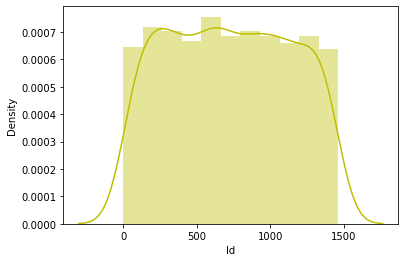

BoxPlot of Id
----------------------------------------------------------------------------


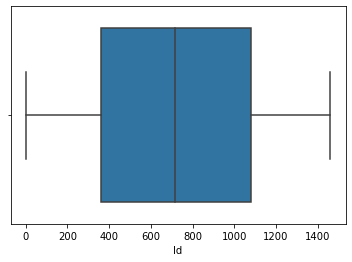

Description of MSSubClass
----------------------------------------------------------------------------
count    1168.000000
mean       56.767979
std        41.940650
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64 Distribution of MSSubClass
----------------------------------------------------------------------------


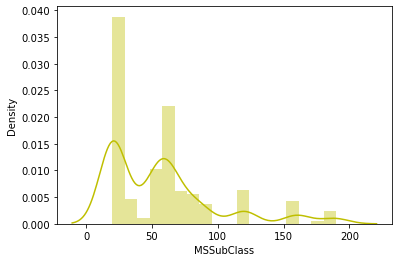

BoxPlot of MSSubClass
----------------------------------------------------------------------------


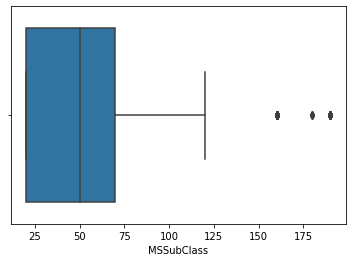

Description of LotFrontage
----------------------------------------------------------------------------
count    954.00000
mean      70.98847
std       24.82875
min       21.00000
25%       60.00000
50%       70.00000
75%       80.00000
max      313.00000
Name: LotFrontage, dtype: float64 Distribution of LotFrontage
----------------------------------------------------------------------------


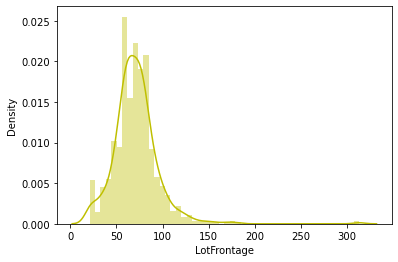

BoxPlot of LotFrontage
----------------------------------------------------------------------------


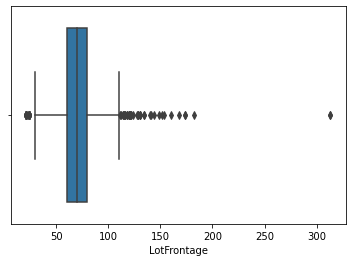

Description of LotArea
----------------------------------------------------------------------------
count      1168.000000
mean      10484.749144
std        8957.442311
min        1300.000000
25%        7621.500000
50%        9522.500000
75%       11515.500000
max      164660.000000
Name: LotArea, dtype: float64 Distribution of LotArea
----------------------------------------------------------------------------


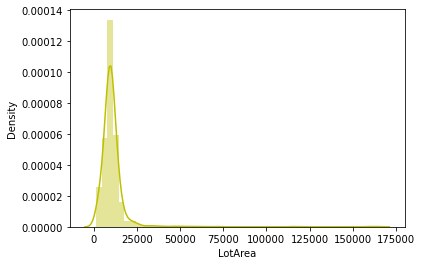

BoxPlot of LotArea
----------------------------------------------------------------------------


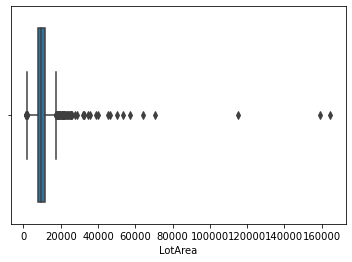

Description of OverallQual
----------------------------------------------------------------------------
count    1168.000000
mean        6.104452
std         1.390153
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64 Distribution of OverallQual
----------------------------------------------------------------------------


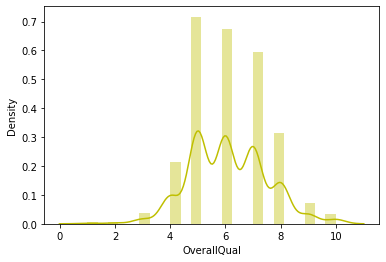

BoxPlot of OverallQual
----------------------------------------------------------------------------


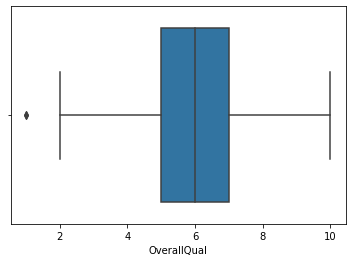

Description of OverallCond
----------------------------------------------------------------------------
count    1168.000000
mean        5.595890
std         1.124343
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64 Distribution of OverallCond
----------------------------------------------------------------------------


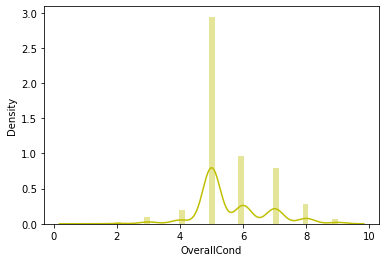

BoxPlot of OverallCond
----------------------------------------------------------------------------


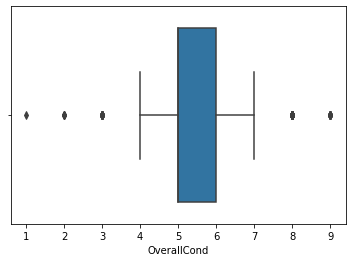

Description of YearBuilt
----------------------------------------------------------------------------
count    1168.000000
mean     1970.930651
std        30.145255
min      1875.000000
25%      1954.000000
50%      1972.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64 Distribution of YearBuilt
----------------------------------------------------------------------------


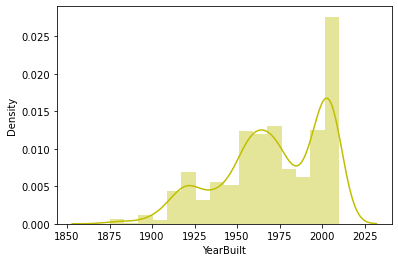

BoxPlot of YearBuilt
----------------------------------------------------------------------------


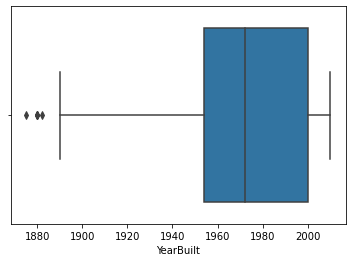

Description of YearRemodAdd
----------------------------------------------------------------------------
count    1168.000000
mean     1984.758562
std        20.785185
min      1950.000000
25%      1966.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64 Distribution of YearRemodAdd
----------------------------------------------------------------------------


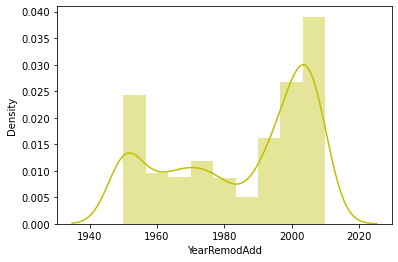

BoxPlot of YearRemodAdd
----------------------------------------------------------------------------


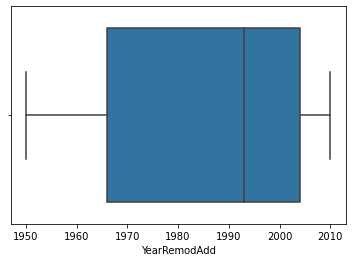

Description of MasVnrArea
----------------------------------------------------------------------------
count    1161.000000
mean      102.310078
std       182.595606
min         0.000000
25%         0.000000
50%         0.000000
75%       160.000000
max      1600.000000
Name: MasVnrArea, dtype: float64 Distribution of MasVnrArea
----------------------------------------------------------------------------


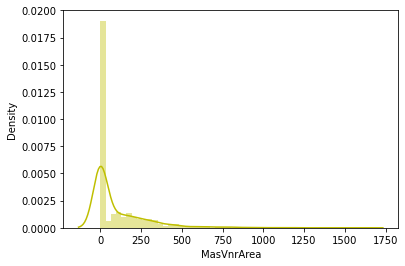

BoxPlot of MasVnrArea
----------------------------------------------------------------------------


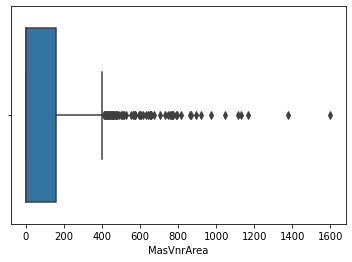

Description of BsmtFinSF1
----------------------------------------------------------------------------
count    1168.000000
mean      444.726027
std       462.664785
min         0.000000
25%         0.000000
50%       385.500000
75%       714.500000
max      5644.000000
Name: BsmtFinSF1, dtype: float64 Distribution of BsmtFinSF1
----------------------------------------------------------------------------


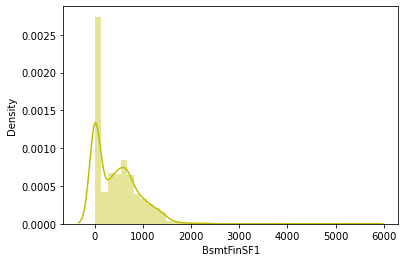

BoxPlot of BsmtFinSF1
----------------------------------------------------------------------------


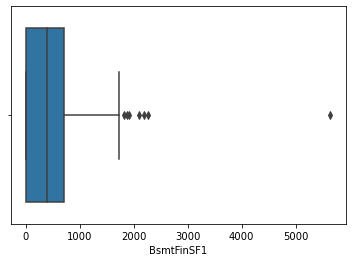

Description of BsmtFinSF2
----------------------------------------------------------------------------
count    1168.000000
mean       46.647260
std       163.520016
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64 Distribution of BsmtFinSF2
----------------------------------------------------------------------------


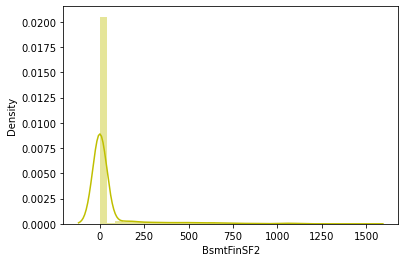

BoxPlot of BsmtFinSF2
----------------------------------------------------------------------------


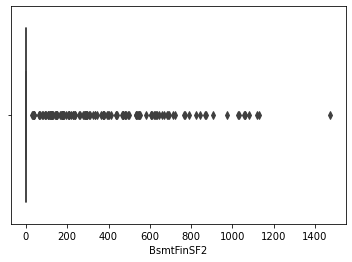

Description of BsmtUnfSF
----------------------------------------------------------------------------
count    1168.000000
mean      569.721747
std       449.375525
min         0.000000
25%       216.000000
50%       474.000000
75%       816.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64 Distribution of BsmtUnfSF
----------------------------------------------------------------------------


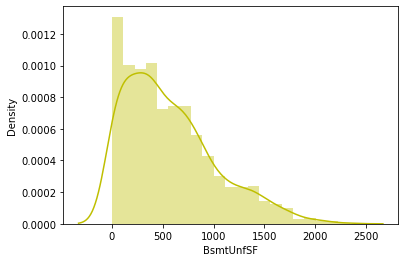

BoxPlot of BsmtUnfSF
----------------------------------------------------------------------------


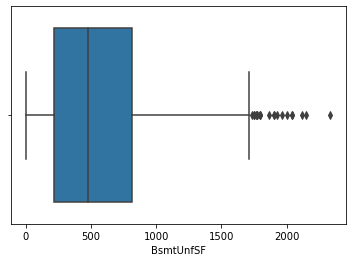

Description of TotalBsmtSF
----------------------------------------------------------------------------
count    1168.000000
mean     1061.095034
std       442.272249
min         0.000000
25%       799.000000
50%      1005.500000
75%      1291.500000
max      6110.000000
Name: TotalBsmtSF, dtype: float64 Distribution of TotalBsmtSF
----------------------------------------------------------------------------


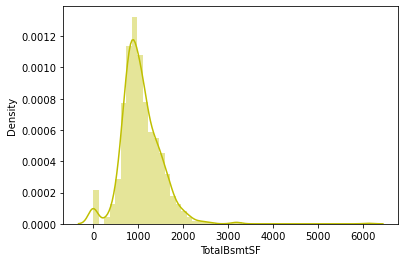

BoxPlot of TotalBsmtSF
----------------------------------------------------------------------------


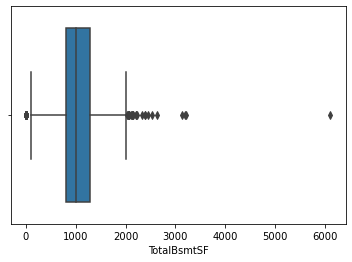

Description of 1stFlrSF
----------------------------------------------------------------------------
count    1168.000000
mean     1169.860445
std       391.161983
min       334.000000
25%       892.000000
50%      1096.500000
75%      1392.000000
max      4692.000000
Name: 1stFlrSF, dtype: float64 Distribution of 1stFlrSF
----------------------------------------------------------------------------


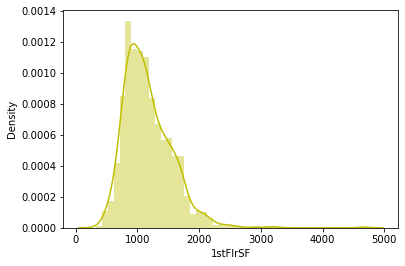

BoxPlot of 1stFlrSF
----------------------------------------------------------------------------


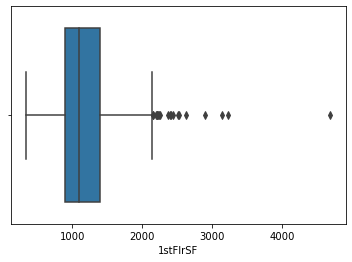

Description of 2ndFlrSF
----------------------------------------------------------------------------
count    1168.000000
mean      348.826199
std       439.696370
min         0.000000
25%         0.000000
50%         0.000000
75%       729.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64 Distribution of 2ndFlrSF
----------------------------------------------------------------------------


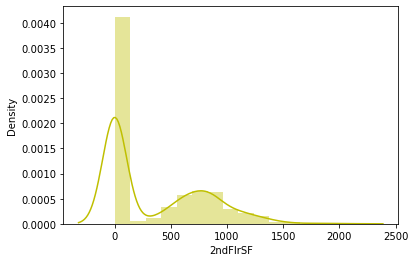

BoxPlot of 2ndFlrSF
----------------------------------------------------------------------------


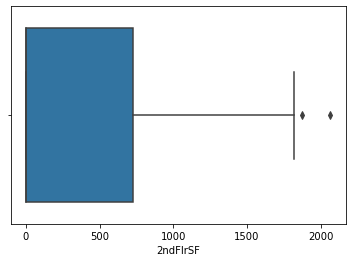

Description of LowQualFinSF
----------------------------------------------------------------------------
count    1168.000000
mean        6.380137
std        50.892844
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64 Distribution of LowQualFinSF
----------------------------------------------------------------------------


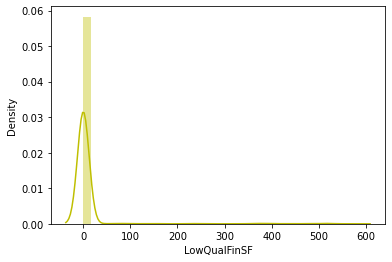

BoxPlot of LowQualFinSF
----------------------------------------------------------------------------


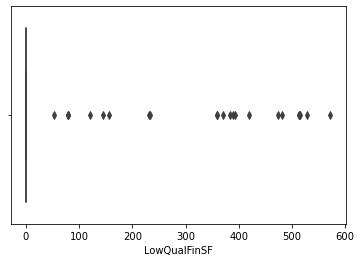

Description of GrLivArea
----------------------------------------------------------------------------
count    1168.000000
mean     1525.066781
std       528.042957
min       334.000000
25%      1143.250000
50%      1468.500000
75%      1795.000000
max      5642.000000
Name: GrLivArea, dtype: float64 Distribution of GrLivArea
----------------------------------------------------------------------------


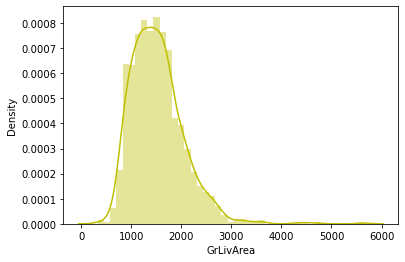

BoxPlot of GrLivArea
----------------------------------------------------------------------------


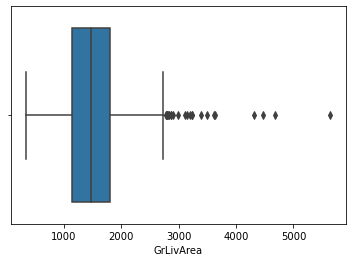

Description of BsmtFullBath
----------------------------------------------------------------------------
count    1168.000000
mean        0.425514
std         0.521615
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64 Distribution of BsmtFullBath
----------------------------------------------------------------------------


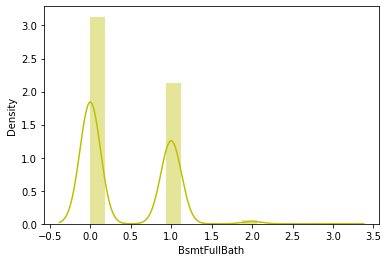

BoxPlot of BsmtFullBath
----------------------------------------------------------------------------


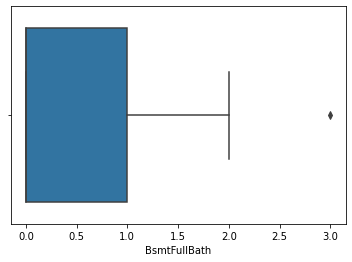

Description of BsmtHalfBath
----------------------------------------------------------------------------
count    1168.000000
mean        0.055651
std         0.236699
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64 Distribution of BsmtHalfBath
----------------------------------------------------------------------------


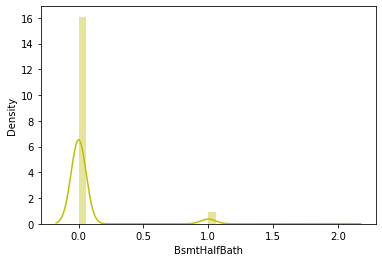

BoxPlot of BsmtHalfBath
----------------------------------------------------------------------------


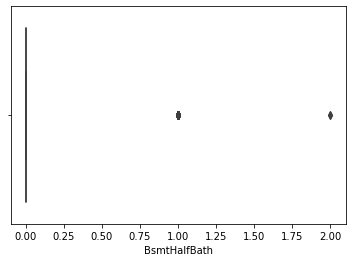

Description of FullBath
----------------------------------------------------------------------------
count    1168.000000
mean        1.562500
std         0.551882
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64 Distribution of FullBath
----------------------------------------------------------------------------


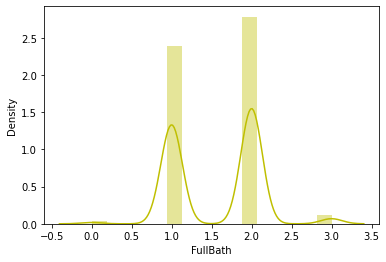

BoxPlot of FullBath
----------------------------------------------------------------------------


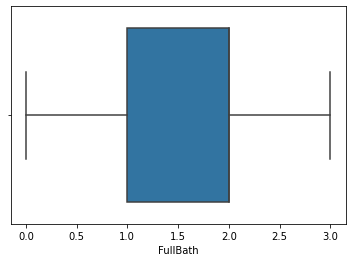

Description of HalfBath
----------------------------------------------------------------------------
count    1168.000000
mean        0.388699
std         0.504929
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64 Distribution of HalfBath
----------------------------------------------------------------------------


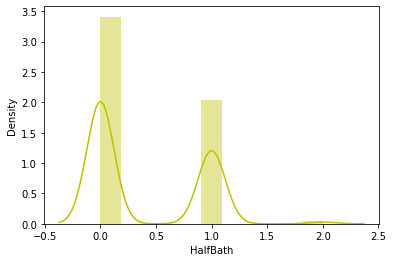

BoxPlot of HalfBath
----------------------------------------------------------------------------


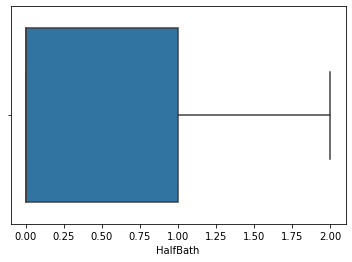

Description of BedroomAbvGr
----------------------------------------------------------------------------
count    1168.000000
mean        2.884418
std         0.817229
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64 Distribution of BedroomAbvGr
----------------------------------------------------------------------------


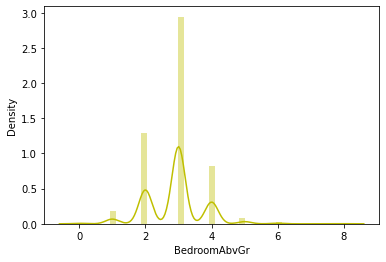

BoxPlot of BedroomAbvGr
----------------------------------------------------------------------------


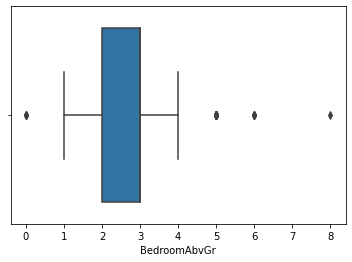

Description of KitchenAbvGr
----------------------------------------------------------------------------
count    1168.000000
mean        1.045377
std         0.216292
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64 Distribution of KitchenAbvGr
----------------------------------------------------------------------------


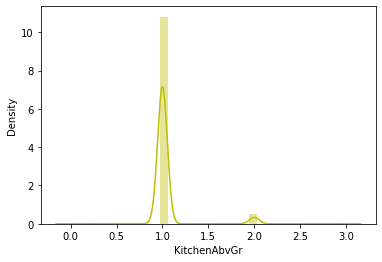

BoxPlot of KitchenAbvGr
----------------------------------------------------------------------------


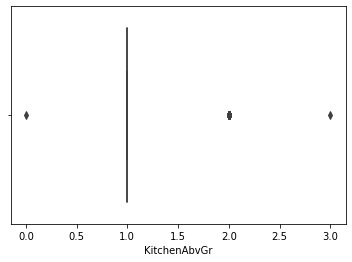

Description of TotRmsAbvGrd
----------------------------------------------------------------------------
count    1168.000000
mean        6.542808
std         1.598484
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64 Distribution of TotRmsAbvGrd
----------------------------------------------------------------------------


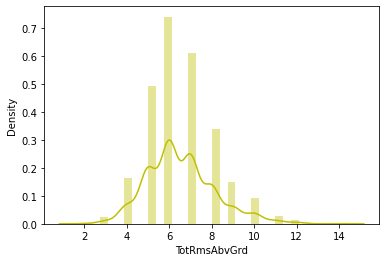

BoxPlot of TotRmsAbvGrd
----------------------------------------------------------------------------


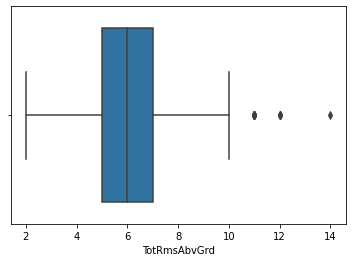

Description of Fireplaces
----------------------------------------------------------------------------
count    1168.000000
mean        0.617295
std         0.650575
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64 Distribution of Fireplaces
----------------------------------------------------------------------------


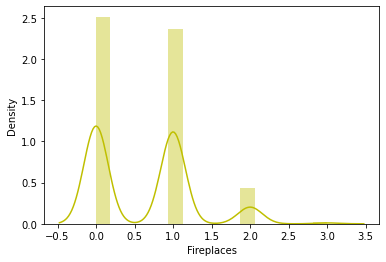

BoxPlot of Fireplaces
----------------------------------------------------------------------------


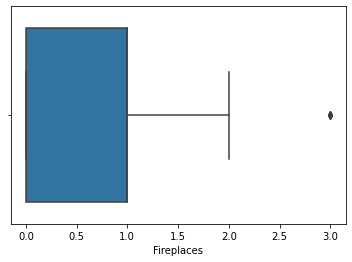

Description of GarageYrBlt
----------------------------------------------------------------------------
count    1104.000000
mean     1978.193841
std        24.890704
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64 Distribution of GarageYrBlt
----------------------------------------------------------------------------


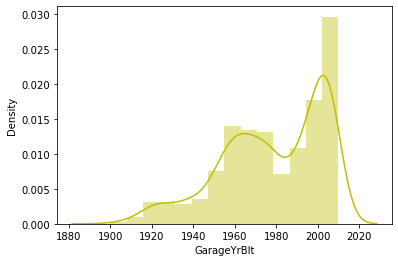

BoxPlot of GarageYrBlt
----------------------------------------------------------------------------


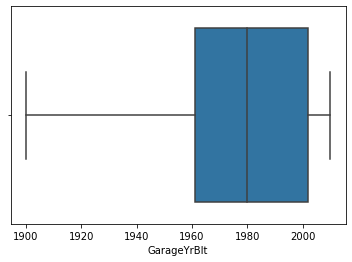

Description of GarageCars
----------------------------------------------------------------------------
count    1168.000000
mean        1.776541
std         0.745554
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64 Distribution of GarageCars
----------------------------------------------------------------------------


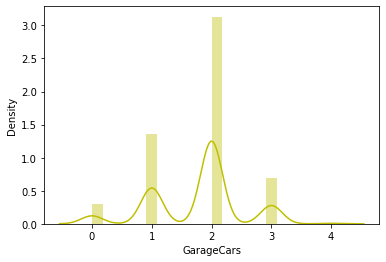

BoxPlot of GarageCars
----------------------------------------------------------------------------


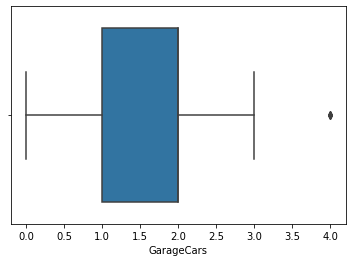

Description of GarageArea
----------------------------------------------------------------------------
count    1168.000000
mean      476.860445
std       214.466769
min         0.000000
25%       338.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64 Distribution of GarageArea
----------------------------------------------------------------------------


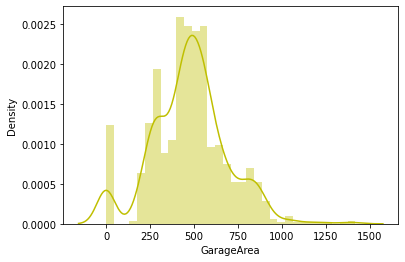

BoxPlot of GarageArea
----------------------------------------------------------------------------


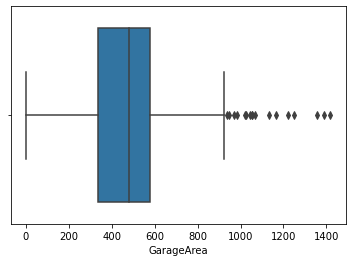

Description of WoodDeckSF
----------------------------------------------------------------------------
count    1168.000000
mean       96.206336
std       126.158988
min         0.000000
25%         0.000000
50%         0.000000
75%       171.000000
max       857.000000
Name: WoodDeckSF, dtype: float64 Distribution of WoodDeckSF
----------------------------------------------------------------------------


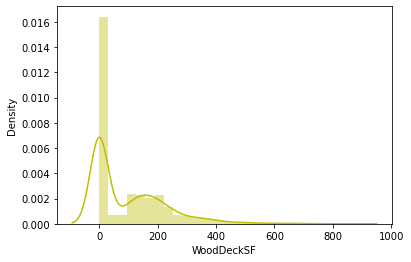

BoxPlot of WoodDeckSF
----------------------------------------------------------------------------


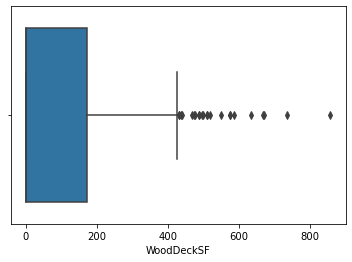

Description of OpenPorchSF
----------------------------------------------------------------------------
count    1168.000000
mean       46.559932
std        66.381023
min         0.000000
25%         0.000000
50%        24.000000
75%        70.000000
max       547.000000
Name: OpenPorchSF, dtype: float64 Distribution of OpenPorchSF
----------------------------------------------------------------------------


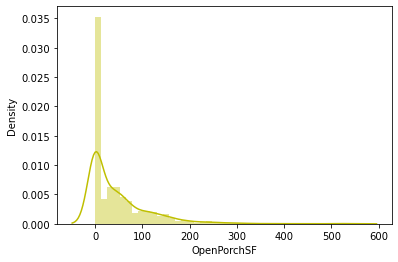

BoxPlot of OpenPorchSF
----------------------------------------------------------------------------


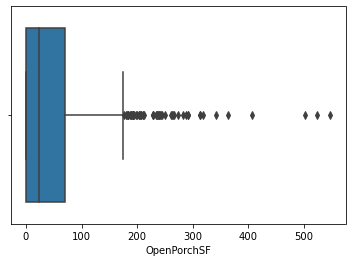

Description of EnclosedPorch
----------------------------------------------------------------------------
count    1168.000000
mean       23.015411
std        63.191089
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64 Distribution of EnclosedPorch
----------------------------------------------------------------------------


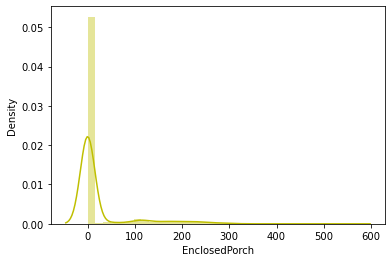

BoxPlot of EnclosedPorch
----------------------------------------------------------------------------


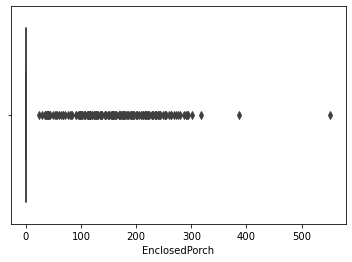

Description of 3SsnPorch
----------------------------------------------------------------------------
count    1168.000000
mean        3.639555
std        29.088867
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64 Distribution of 3SsnPorch
----------------------------------------------------------------------------


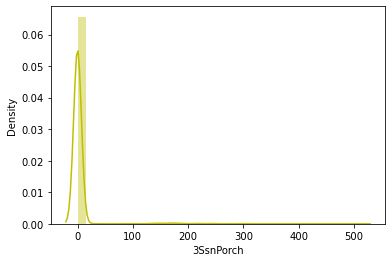

BoxPlot of 3SsnPorch
----------------------------------------------------------------------------


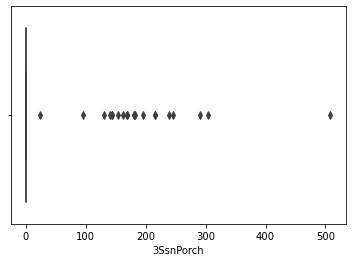

Description of ScreenPorch
----------------------------------------------------------------------------
count    1168.000000
mean       15.051370
std        55.080816
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64 Distribution of ScreenPorch
----------------------------------------------------------------------------


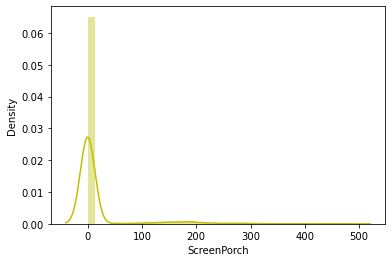

BoxPlot of ScreenPorch
----------------------------------------------------------------------------


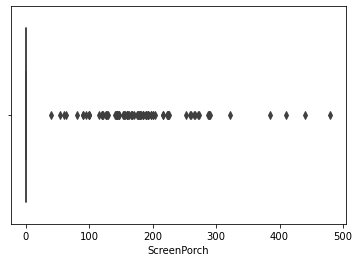

Description of PoolArea
----------------------------------------------------------------------------
count    1168.000000
mean        3.448630
std        44.896939
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64 Distribution of PoolArea
----------------------------------------------------------------------------


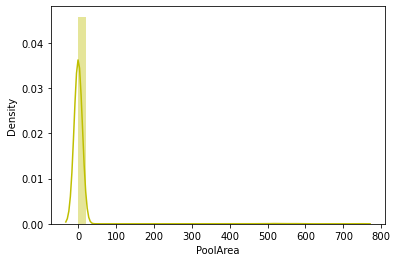

BoxPlot of PoolArea
----------------------------------------------------------------------------


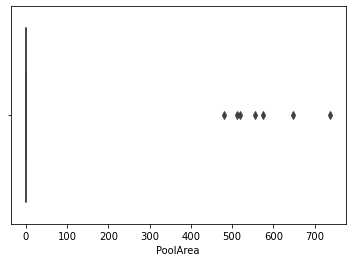

Description of MiscVal
----------------------------------------------------------------------------
count     1168.000000
mean        47.315068
std        543.264432
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64 Distribution of MiscVal
----------------------------------------------------------------------------


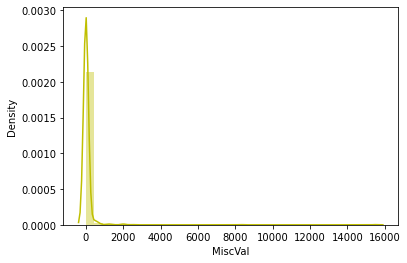

BoxPlot of MiscVal
----------------------------------------------------------------------------


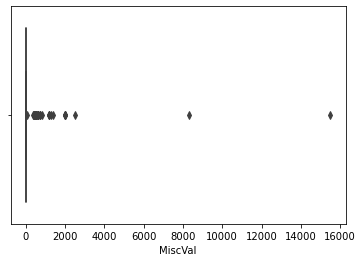

Description of MoSold
----------------------------------------------------------------------------
count    1168.000000
mean        6.344178
std         2.686352
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64 Distribution of MoSold
----------------------------------------------------------------------------


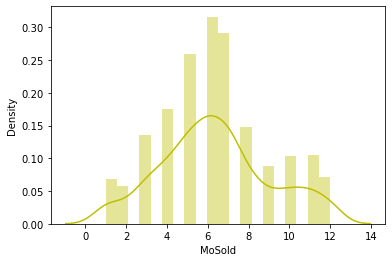

BoxPlot of MoSold
----------------------------------------------------------------------------


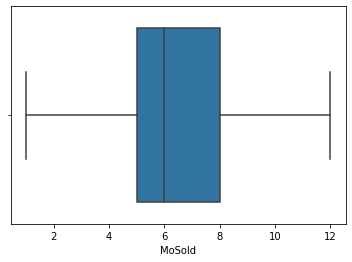

Description of YrSold
----------------------------------------------------------------------------
count    1168.000000
mean     2007.804795
std         1.329738
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64 Distribution of YrSold
----------------------------------------------------------------------------


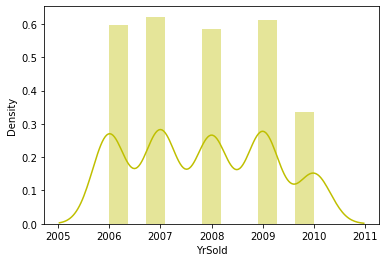

BoxPlot of YrSold
----------------------------------------------------------------------------


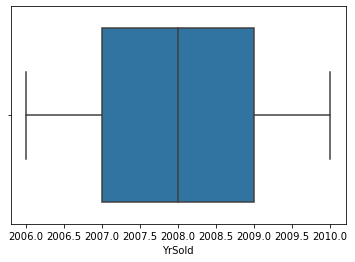

Description of SalePrice
----------------------------------------------------------------------------
count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64 Distribution of SalePrice
----------------------------------------------------------------------------


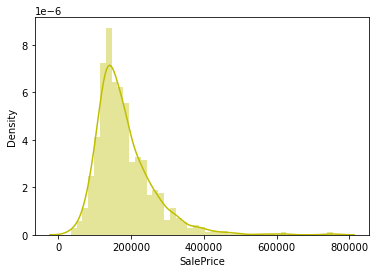

BoxPlot of SalePrice
----------------------------------------------------------------------------


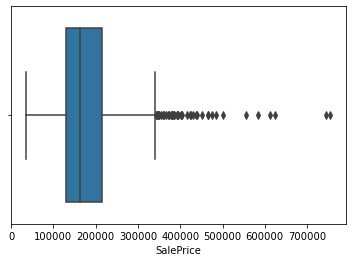

In [16]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

-ID columns total 1168 nos. of dataset.Min no. 1 & max is 1460.

-MSSubClass:-type od dwelling involved in sale. Min type 20 to Max type 190 available for sale.Data is positively skewed.Outliers are seen in MSSubClass.

-LotFrontage:-Linear feet of street connected to property.Min 21 ft & max 313 feet connected to property.Data is positively skewed. Outliers are present in dataset.

-Lot Area: Lot size in square feet. Min lot size is 1300 sq. ft, maximum 164660m sq. ft. Mean of lot area is 10484 sq. ft. Data is highly positively skewd means outliers are present in this dataset.

-OverallQuality: Rates the overall material and finish of the house. Min 1 rating given & max 10 rating given.Data is negetively skewed.Outliers are seen in lower side.

-Overall Condition: Min 1 rating given & max : 9 rating given.Skenwess is present in both the side.

-Year Build: Oldest 1875 year & newest 2010 available for sale.Data is negetively skewed. Outliers are seen in min side.

-YearRemodAdd:-Remodel date (same as construction date if no remodeling or additions). Min 1950 remodel year avialble & max 2010.No skewness is observd in dataset.

-MasVnrArea:Masonry veneer area in square feet. Min o sq. ft & max 1600 sq. ft. area. Data is positively skewed & outliers are seen in dataset.

-BsmtFinSF1:Type 1 finished square feet. MIn 0 sq, ft & max 5644 sq. ft. Mean 44 sq. ft. type 1 fininshed sq. ft., Outliers are present in the column.

-BsmtFinSF2:- Type 2 Finished square feet: Min 0 Sq. ft & max 1474 sq. ft available.Skewnes present in thos data.

-BsmtUnfSF:Unfinished square feet of basement area.Min 0 sq. ft. & max 2336 sq. ft. unfinished basement area.Data is positively skewed & Outiers are present in this dataset.

-TotalBsmtSF:Total square feet of basement area. Min 0 sq. ft are & max: 6110 sq. ft basement area is availabele. Data is skewed & Outliers are seen in both the side.

-1stFlrSF:First Floor square feet.Min 334 sq. ft. & MAx 4692 sq. ft. first floor area is available.Data is positively skwed & outliers are seen in this dataset.

-2ndFlrSF: second floor sq ft: Min 0 sq. ft & max 2065 sq. ft. arae. Data is positively skewed & outliers are seen this data.

-LowQualFinSF:Low quality finished square feet (all floors). Min 0 Sq. Ft & Max 572 sq. ft low quality finished floors are available. Same as outliers are present in this dataset.

-GrLivArea:Above grade (ground) living area square feet.Min ground living area is 334 sq. ft & max 5642 sq. ft. Data  is postively skwed & outliers are present in this dataset.

-BsmtFullBath:Basement full bathrooms: Min 0 & max 3 bathrooms are available in basement.

-BsmtHalfBath: Basement half bathrooms: Min 0 & max 2 half bathrooms are available.

-FullBath:Full bathrooms above grade. Min 0 & max 3 bathrooms are vaialbel.

-HalfBath: Half baths above grade.Min 0 & max 2 half baths are available.

-BedroomAbvGr:-Bed rooms above Ground. Min 0 & Max 8 bedrooms are avialble above Ground
Kitchen above ground: Min 0 & max 3.

-Total rooms above ground: MIn 2 & max 14 rooms are availble above ground.Outliers are present in this dataset.

-FirePlaces:Min 0 & max 3 fireplaces are available.

-GarageYrBlt:Year garage was built. Min 1900 year & Max 2010 year garage was build.

-GarageCars:Size of garage in car capacity. Min size 0 & max size capcity is 4 cars.

-GarageArea: Min garage area is o sq. ft. & max 1418 sq. ft.Data is skwed & outliers are seen.

-WoodDeckSF:Wood deck area in square feet. Min 0 & max 857 sq. ft wood deck area available.Outliers are present in this dataset.

-OpenPorchSF: -Open Porch Sq. ft. : Min 0 & max 547 sq. ft open space available.Outliers are present.

-Enclosed Porch in sq. ft. : Min 0 & Max 552 Sq. ft. enclosed space is availble.Otliers are present in data.

-3SsnPorch:Three season porch area in square feet.Min 0 & max 508 sq. ft. area is available.

-ScreenPorch: Min 0 & Max 480 sq. ft. screen porch available.

-PoolArea: Pool Area in sq. ft. Min 0 sq. ft & max 738 sq. ft. area is availble.

-MiscVal:$Value of miscellaneous feature. Min value is 0 & max value is 15500$.Skweness & outliers are seen in data.

-MoSold:Month Sold (MM). Min 1 month & max 12 month sold.

-YrSold: Sold Year. Min 2006 & max 2010 Year sold.

-Sale Price: Min sale price 34900 & MAx 755000 . Data is positively skwed & Otliers are seen.


In [17]:
x=df.drop("SalePrice", axis=1)
y=df["SalePrice"]

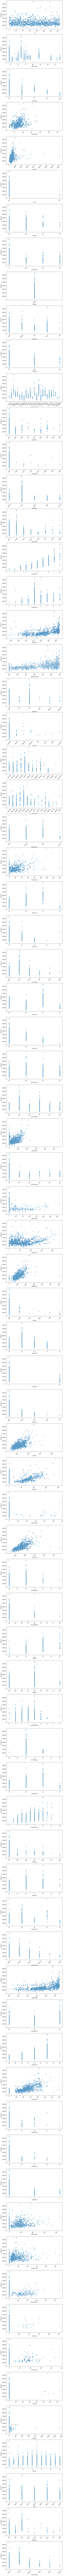

In [18]:
#Lets check data destribution, visualize the dataset

plt.figure(figsize=(10,500))
plotnumber=1

for column in x:
    if plotnumber<=81:
        ax=plt.subplot(80,1, plotnumber)
        sns.scatterplot(df[column],y)
        plt.xlabel(column,fontsize=10)
        plt.xticks(rotation = 45)
    plotnumber+=1
    
plt.show()

-ID no. is just a identical number that will not more contribute on sale price.

-MSS Class: Type 20(1-STORY 1946 & NEWER ALL STYLES) & type 60(2-STORY 1946 & NEWER) are genrally getting more sale price than other.Tyep 180 (PUD - MULTILEVEL - INCL SPLIT LEV/FOYER) are not getting muh selling price than other.Type 40(1-STORY W/FINISHED ATTIC ALL AGES) are evry less nos.  are available for sale.

-MSZoning: Identifies the general zoning classification of the sale.: RL (Residential Low Density) are getting more salae price than other zone.Followed by RM (Residential Medium Density) getting more saling price.Followed by FV(Floating village), RH: Residential High density & Commercial area are getting very less saling price.

-LotFrontage: Linear feet of street connected to property: Those houses are having less linear feet of street are generraly getting more selling price.Some houses are very lrage linear feet more than 300.

-LotArea:Lot size in square feet.The lot area which is less than 20000 are getting very good selling price.Some houses lot area is more than 100000.

-Street: Type of road access to property. Pave street are getting more selling price as comapred to Grvl.

-LotShape:General shape of property.IR1 me.ans Slightly irregular are getting good selling price, followed by Reg: Regular shape,IR3:Irregular shape are gettimng very less Saling price.

-LandContour: Flatness of the property.Lv1:NEar Flat or level are getting more saling price, folowed by HLS:Hillside - Significant slope from side to side, Low:Depression & Then after Bnk:Banked - Quick and significant rise from street grade to building: which is getting very less saling price than others.

-Utilities :All public Utilities (E,G,W,& S) are getting very good saling price.

-LotConfig: Lot configuration: Inside lot & Corner lot are generally getting good selling price than others.Frontage on 3 sides of property are less in nos. & generally not getting more selling price.

-LandSlope: EGntle Slope are getting more salling price followed by moderate slope & severe slope.

-Neighborhood: Physical locations within Ames city limits.NoRidge(Northridge) and NridgHt(Northridge Heights) are generally getting good sellunfg price.

-Condition1: Normal condition houses are getting good selling price.RRNe(Within 200' of East-West Railroad) are very less in nos. & also not getting not much selling price.

-Condition2: Proximity to various conditions (if more than one is present), Normal condition is getting very good saling price.Other condition houses are very less in nos. & also not getting good selling prices.

-BldgType: Type of dwelling: Single-family Detached	are getting good selling price.Followed by Townhouse End Unit.Whre as others are not getting much salling price.

-HouseStyle: 2Story are getting good selling price follwed by one story houses getting good saling price.1.5Unf(One and one-half story: 2nd level unfinished) are getting very less saling price than others.

-Overall Quality: The houses which overall quality rating is high they are getting ver good saling price.

-Overall condition: Rated 5 houses are getting good seling price followed by rating 6 & above getting good saling price. The houses which are having overall condition less than 5 not getting good selling price.

-YearBuild: No doubt the houses which Year build is not older are getting good saling price & thehouses which year build is older then that is not getting good selling price.

-YearRemodAdd:Remodel date (same as construction date if no remodeling or additions). NEwly remodeling houses are getting good selling price in the year of 1995 to 2010.

-RoofStyle: Type of roof: Hip roof style are gerrting good price followed by Gabel roof style.Grambel & all other are not getting good selling price.

-RoofMatl: Roof material:generally peoples are preferring for:CompShg(Standard (Composite) Shingle)roof material are they are getting good saling price.Followed by other roof material. Other roof material are not commonly used.

-Exterior1st: Exterior covering on house: Generaly peoples are preferring for VinylSd(Vinyl Siding) are getting good selling price.Folowed by cement board.MetalSd(Metal Siding),BrkFace(Brick Face) &  Plywood(Plywood) are alos getting average selling price.

-Exterior2: are also getting prices as per exterior 1.

-Masonry veneer type: Stone tyep are getting good selling price follwed by brick face.

-MasVnrArea: Masonry veneer area in square feet. Generally more the area more the selling price. But in some cases if area is not available they are also getting good selling price may be due to some other features.

-ExterQual: Evaluates the quality of the material on the exterior. Selling price is good as per quality of exterior.

-ExterCond: Evaluates the present condition of the material on the exterior. Average/Typical condition home are getting good selling price, followed by good condition getting good selling price.

-Foundation: Type of foundation.PConc(Poured Contrete) are getting good selling price.followed by CBlock(Cinder Block) & BrkTil	Brick & Tile.

-Basement Qulity: Which house basement quality is good generally they are getting good selling price. Selling price is depend on the condition of basement.

-Basement Condition:- Typical/Average condition basement houses are getting good selling price followed by good comndition.

-Basement Expouser:- Getting selling price as per the expouser of basement.

-BsmtFinType1: Rating of basement finished area: Generally good living type are getting good selling price followed by unfinished.

-BsmtFinSF1: Type 1 finished square feet. Selling price increases with increase in square feet area

-BsmtFinType2: Rating of basement finished area (if multiple types): Unfinished basement area generraly getting getting  good selling price.

-BsmtFinSF2: Type 2 finished square feet. That generally not depend on sq. area. If no type 2 finished sq, ft area are also getting very good selling prices.

-BsmtUnfSF: Unfinished square feet of basement area. As the increase in area the selling price is also incraeses.

-TotalBsmtSF: Total square feet of basement area. Selling price is increase with increase in increase in basement sq. ft. area.

-Heating: Type of heating. GasA(Gas forced warm air furnace) are getting good selling price than other heating type.

-HeatingQC: Heating quality and condition. Getting good selling price as per heating quality.

-CentralAir: Central air conditioning. The houses are getting good selling price & peoples are preferring most are central air conditioning.

-Electrical: Electrical system.SBrkr(Standard Circuit Breakers & Romex) are getting good selling price followed by Fuse(Fuse Box over 60 AMP and all Romex wiring (Average))

-1stFlrSF: First Floor square feet. Selling price incraese with the increase in sq. ft. area of first floor. 

-2ndFlrSF: Second floor square feet. Selling price increase with increase in second floor area.

-LowQualFinSF: Low quality finished square feet (all floors). No low quality all floors area getting good selling price.

-GrLivArea: Above grade (ground) living area square feet. Selling price incrases with increase in ground living area in sq. ft.

-BsmtFullBath: Basement full bathrooms. Getting good selling price whose are having one full basement bathrooms follwed by no bathrooms.

-BsmtHalfBath: Basement half bathrooms.Getting good selling price whose does not having bathrroms followed by one bathrooms.

-FullBath: Full bathrooms above grade. Getting good selling price which having havigher bathrroms. 3 bathrooms houses are getting very good selling price followed by 2 & 1.

-HalfBath: Half baths above grade. The houses are having one half baths above grades are getting good selling price followed by no baths are getting good selling price.

-Bedrooms above ground: Price incrases with incrase in bedrooms above ground. Generaly 4 ,bedrrrom are getting good selling price, followed by 3, 2 & 1.

-Kitchen above ground: Generally 1 kitchen are getting good selling price. 2 kitchen & above are very less in nos. & also not getting good selling price.

-Getting good selling price as per kitchen qaulity.

-TotRmsAbvGrd: Total rooms above grade (does not include bathrooms). Generally more the rooms are getting more selling price. 10 rooms are mainly getting more selling price followed by 11 & below 10 rooms.

Functional: Home functionality (Assume typical unless deductions are warranted). Typically functionality houses are getting good selling price.

-Fireplaces: 2 & 1 fireplaces are getting good price.

-Firequality: Good & typical quality are getting very good selling price.

-GarageType: Garage location. Attachd	Attached to home are getting are good selling price. followed by Built in garage are getting ood selling price.

-Garage Year Build: Newly build garages are getting good selling price.

-Garage fininshed which has finished type are getting good price followed by roughfinished & unfinished.

-GarageCars: Size of garage in car capacity. Three cars capacity are getting good selling price followed by 3, 2.

-Garage Area: Price increase with the increase in area of garage.

-Garage  Quality: Typical/Average quality garages are getting good selling prices.

-Same as garage condition.

-PavedDrive: Paved driveway. Paved drive are getting good selling price.

-WoodDeckSF: Wood deck area in square feet.Selliing price increases with increase in  Wood deck.

-OpenPorchSF: Selling price increase with increase in open porch.

-Enclosed orch: The houses  which does not have enclosed porch are also having good selling porch.

-3SsnPorch: Three season porch area in square feet same as above.

-Screen Porch & Pool area, MiscVal: $Value of miscellaneous feature which does not having area getting very good selling price.

-Month sold & Year Sold are of 2006 to 1010 year

-Sale Type:- New(Home just constructed and sold) are getting good selling price followed by WD (Warranty Deed - Conventional)

-Sale Condition:- Normal	Normal Sale are getting very good selling price followed by Partial	Home was not completed when last assessed (associated with New Homes).


In [19]:
#Treating Outliers 
num_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [20]:
def remove_outlier(num_data):
    sorted(num_data)
    Q1,Q3=np.percentile(num_data,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [21]:
for column in num_data.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

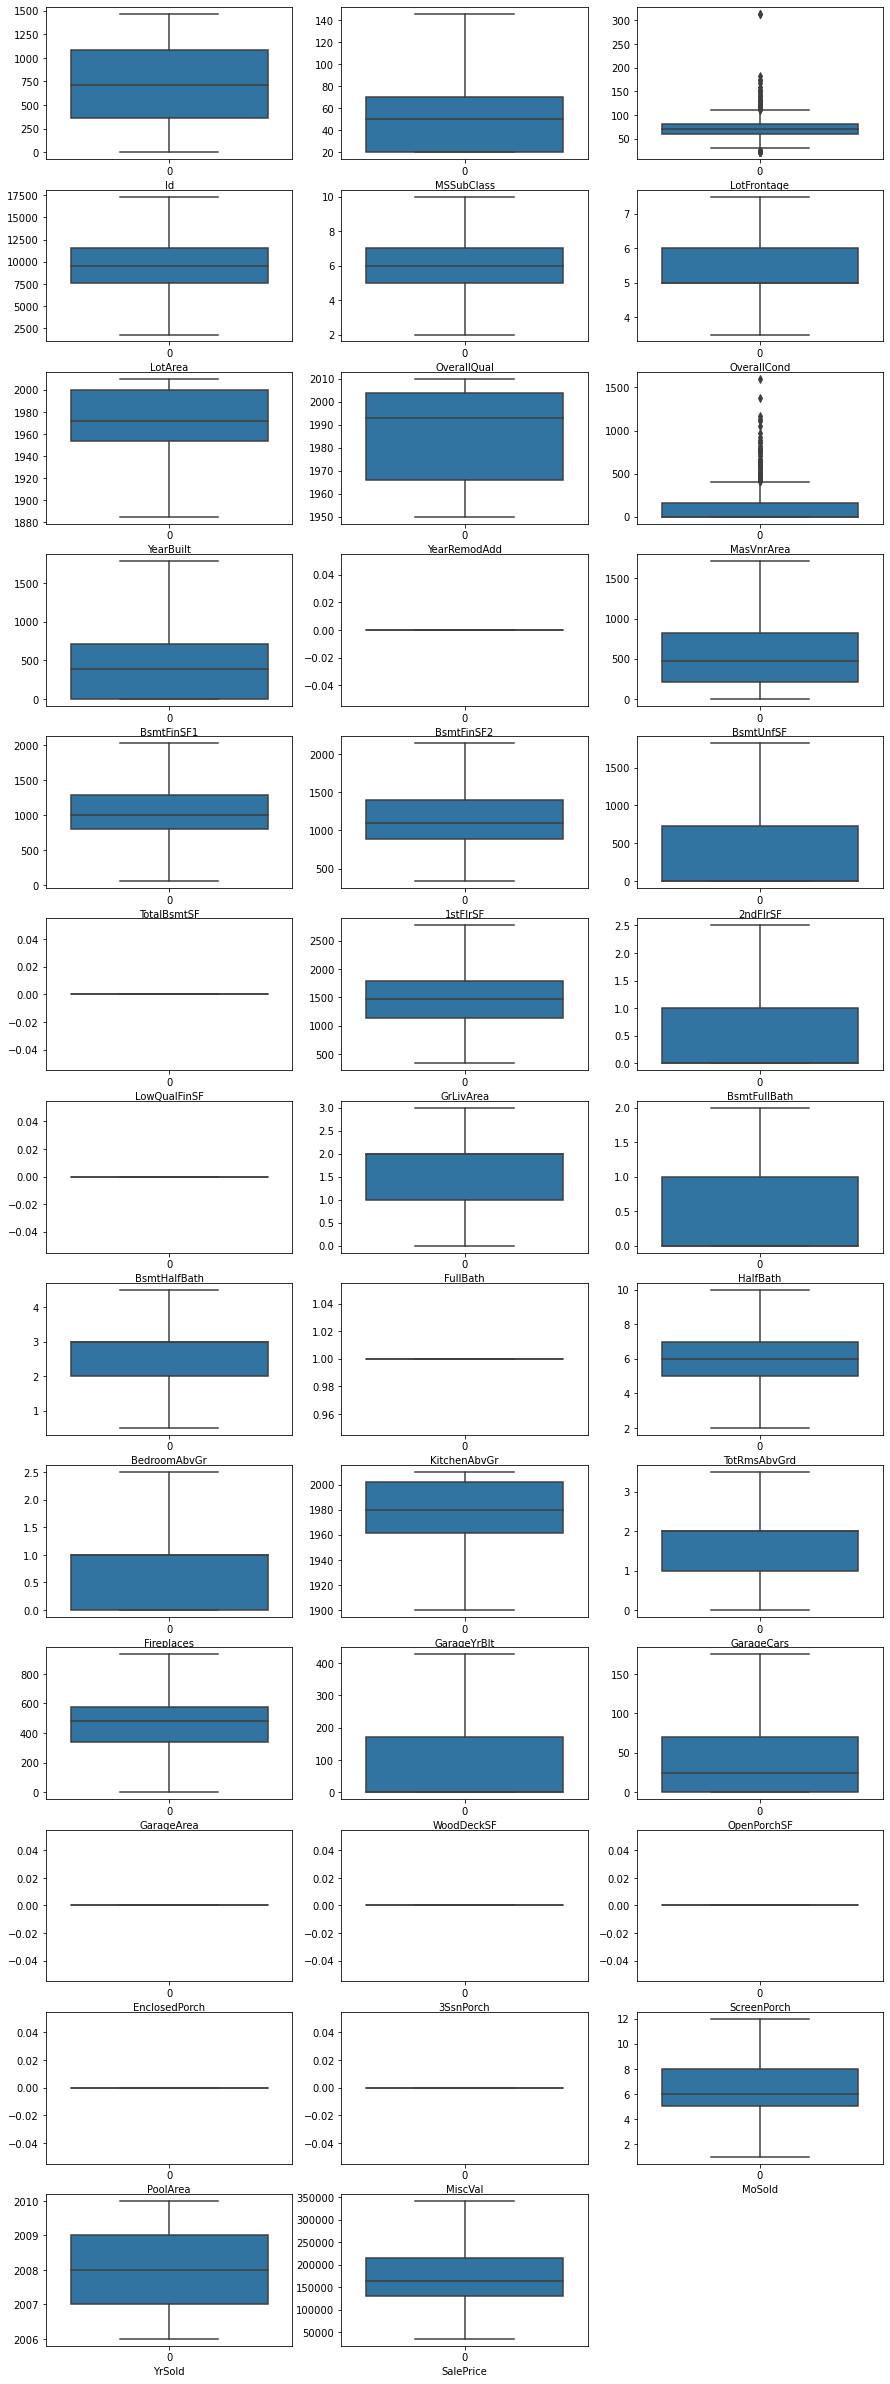

In [22]:
#Finding the outliers using Box plot
    #Finding the outliers using boxplot

plt.figure(figsize=(15,100))
graph=1

for column in num_data:
    
    if graph<=81:
        
        plt.subplot(30,3, graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=10)
    

    graph+=1

plt.show()

In [23]:
#Now we are going to handle the null values present in numerical columns with the use of mean method
for i in num_data:
    df[i]=df[i].fillna(df[i].mean())

In [24]:
cat_data.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
#Categorical values

cat_data1=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']

In [26]:
#Filling null categorical values with mode
for i in cat_data1:
    df[i]=df[i].fillna(df[i].mode()[0])

In [27]:
#Finding Null values 

df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

# Encoding the object datatype using label encoder

In [28]:
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()

In [29]:
df[cat_data1]=df[cat_data1].apply(LabelEncoder().fit_transform)

df.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  127.0       120.0         3     70.98847   4928.0       1         0   
1  889.0        20.0         3     95.00000  15865.0       1         0   
2  793.0        60.0         3     92.00000   9920.0       1         0   
3  110.0        20.0         3    105.00000  11751.0       1         0   
4  422.0        20.0         3     70.98847  16635.0       1         0   

   LandContour  Utilities  LotConfig  ...  EnclosedPorch  3SsnPorch  \
0            3          0          4  ...            0.0        0.0   
1            3          0          4  ...            0.0        0.0   
2            3          0          1  ...            0.0        0.0   
3            3          0          4  ...            0.0        0.0   
4            3          0          2  ...            0.0        0.0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0          0.0       0.0      0.0     2.0  2007.0         8              4   
1          0.0       0.0      0.0    10.0  2007.0         8              4   
2          0.0       0.0      0.0     6.0  2007.0         8              4   
3          0.0       0.0      0.0     1.0  2010.0         0              4   
4          0.0       0.0      0.0     6.0  2009.0         8              4   

   SalePrice  
0   128000.0  
1   268000.0  
2   269790.0  
3   190000.0  
4   215000.0  

[5 rows x 77 columns]

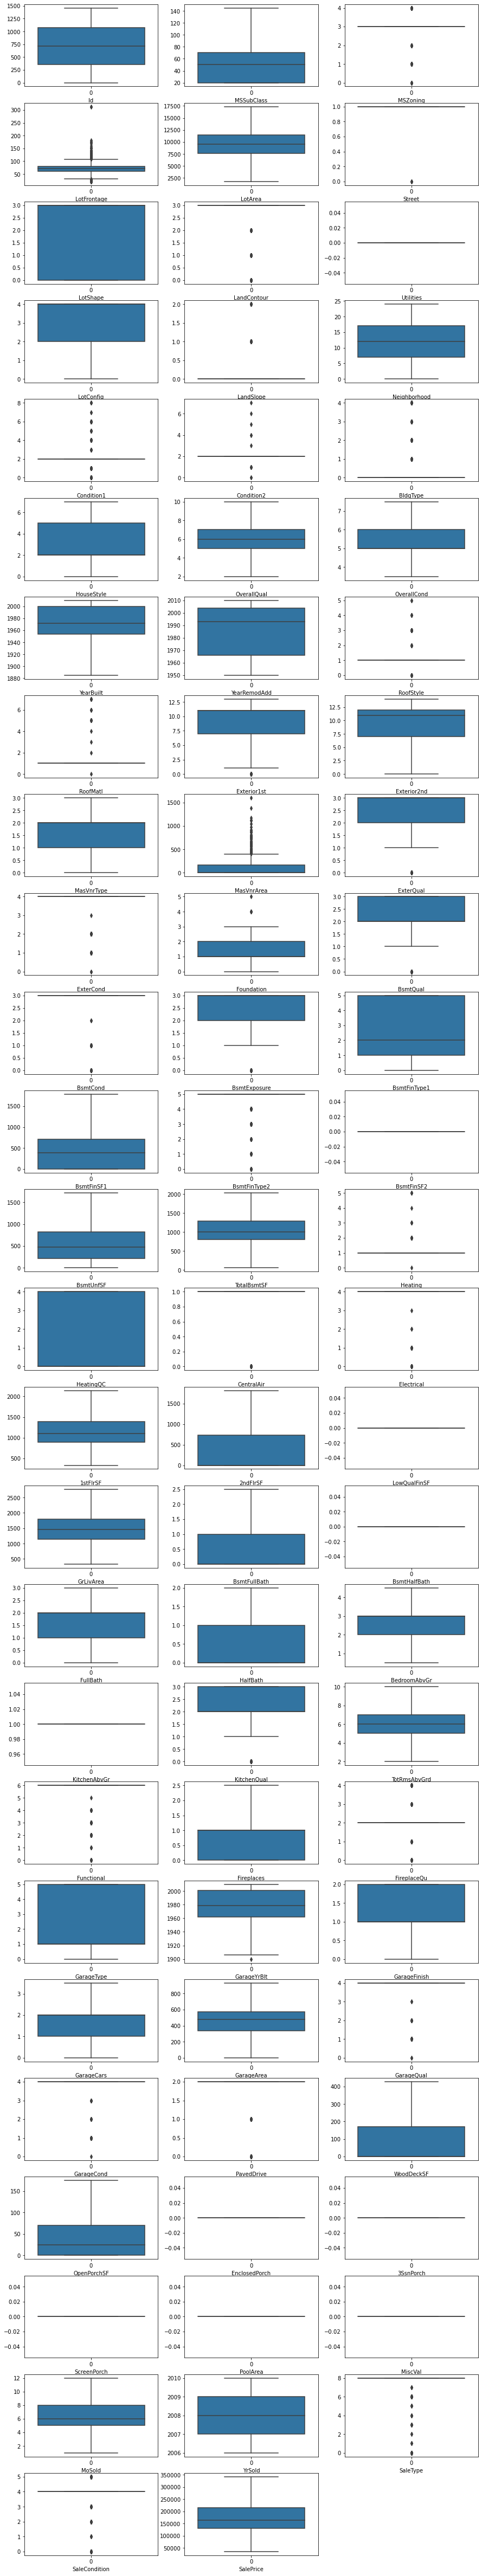

In [30]:
#Finding the outliers using Box plot
    #Finding the outliers using boxplot

plt.figure(figsize=(15,100))
graph=1

for column in df:
    
    if graph<=81:
        
        plt.subplot(30,3, graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=10)
    

    graph+=1

plt.show()

In [31]:
#Some outliers are seen because of categorical columns, that need not to remove.

# Finding the correlationship between dataset using Heatmap

<AxesSubplot:>

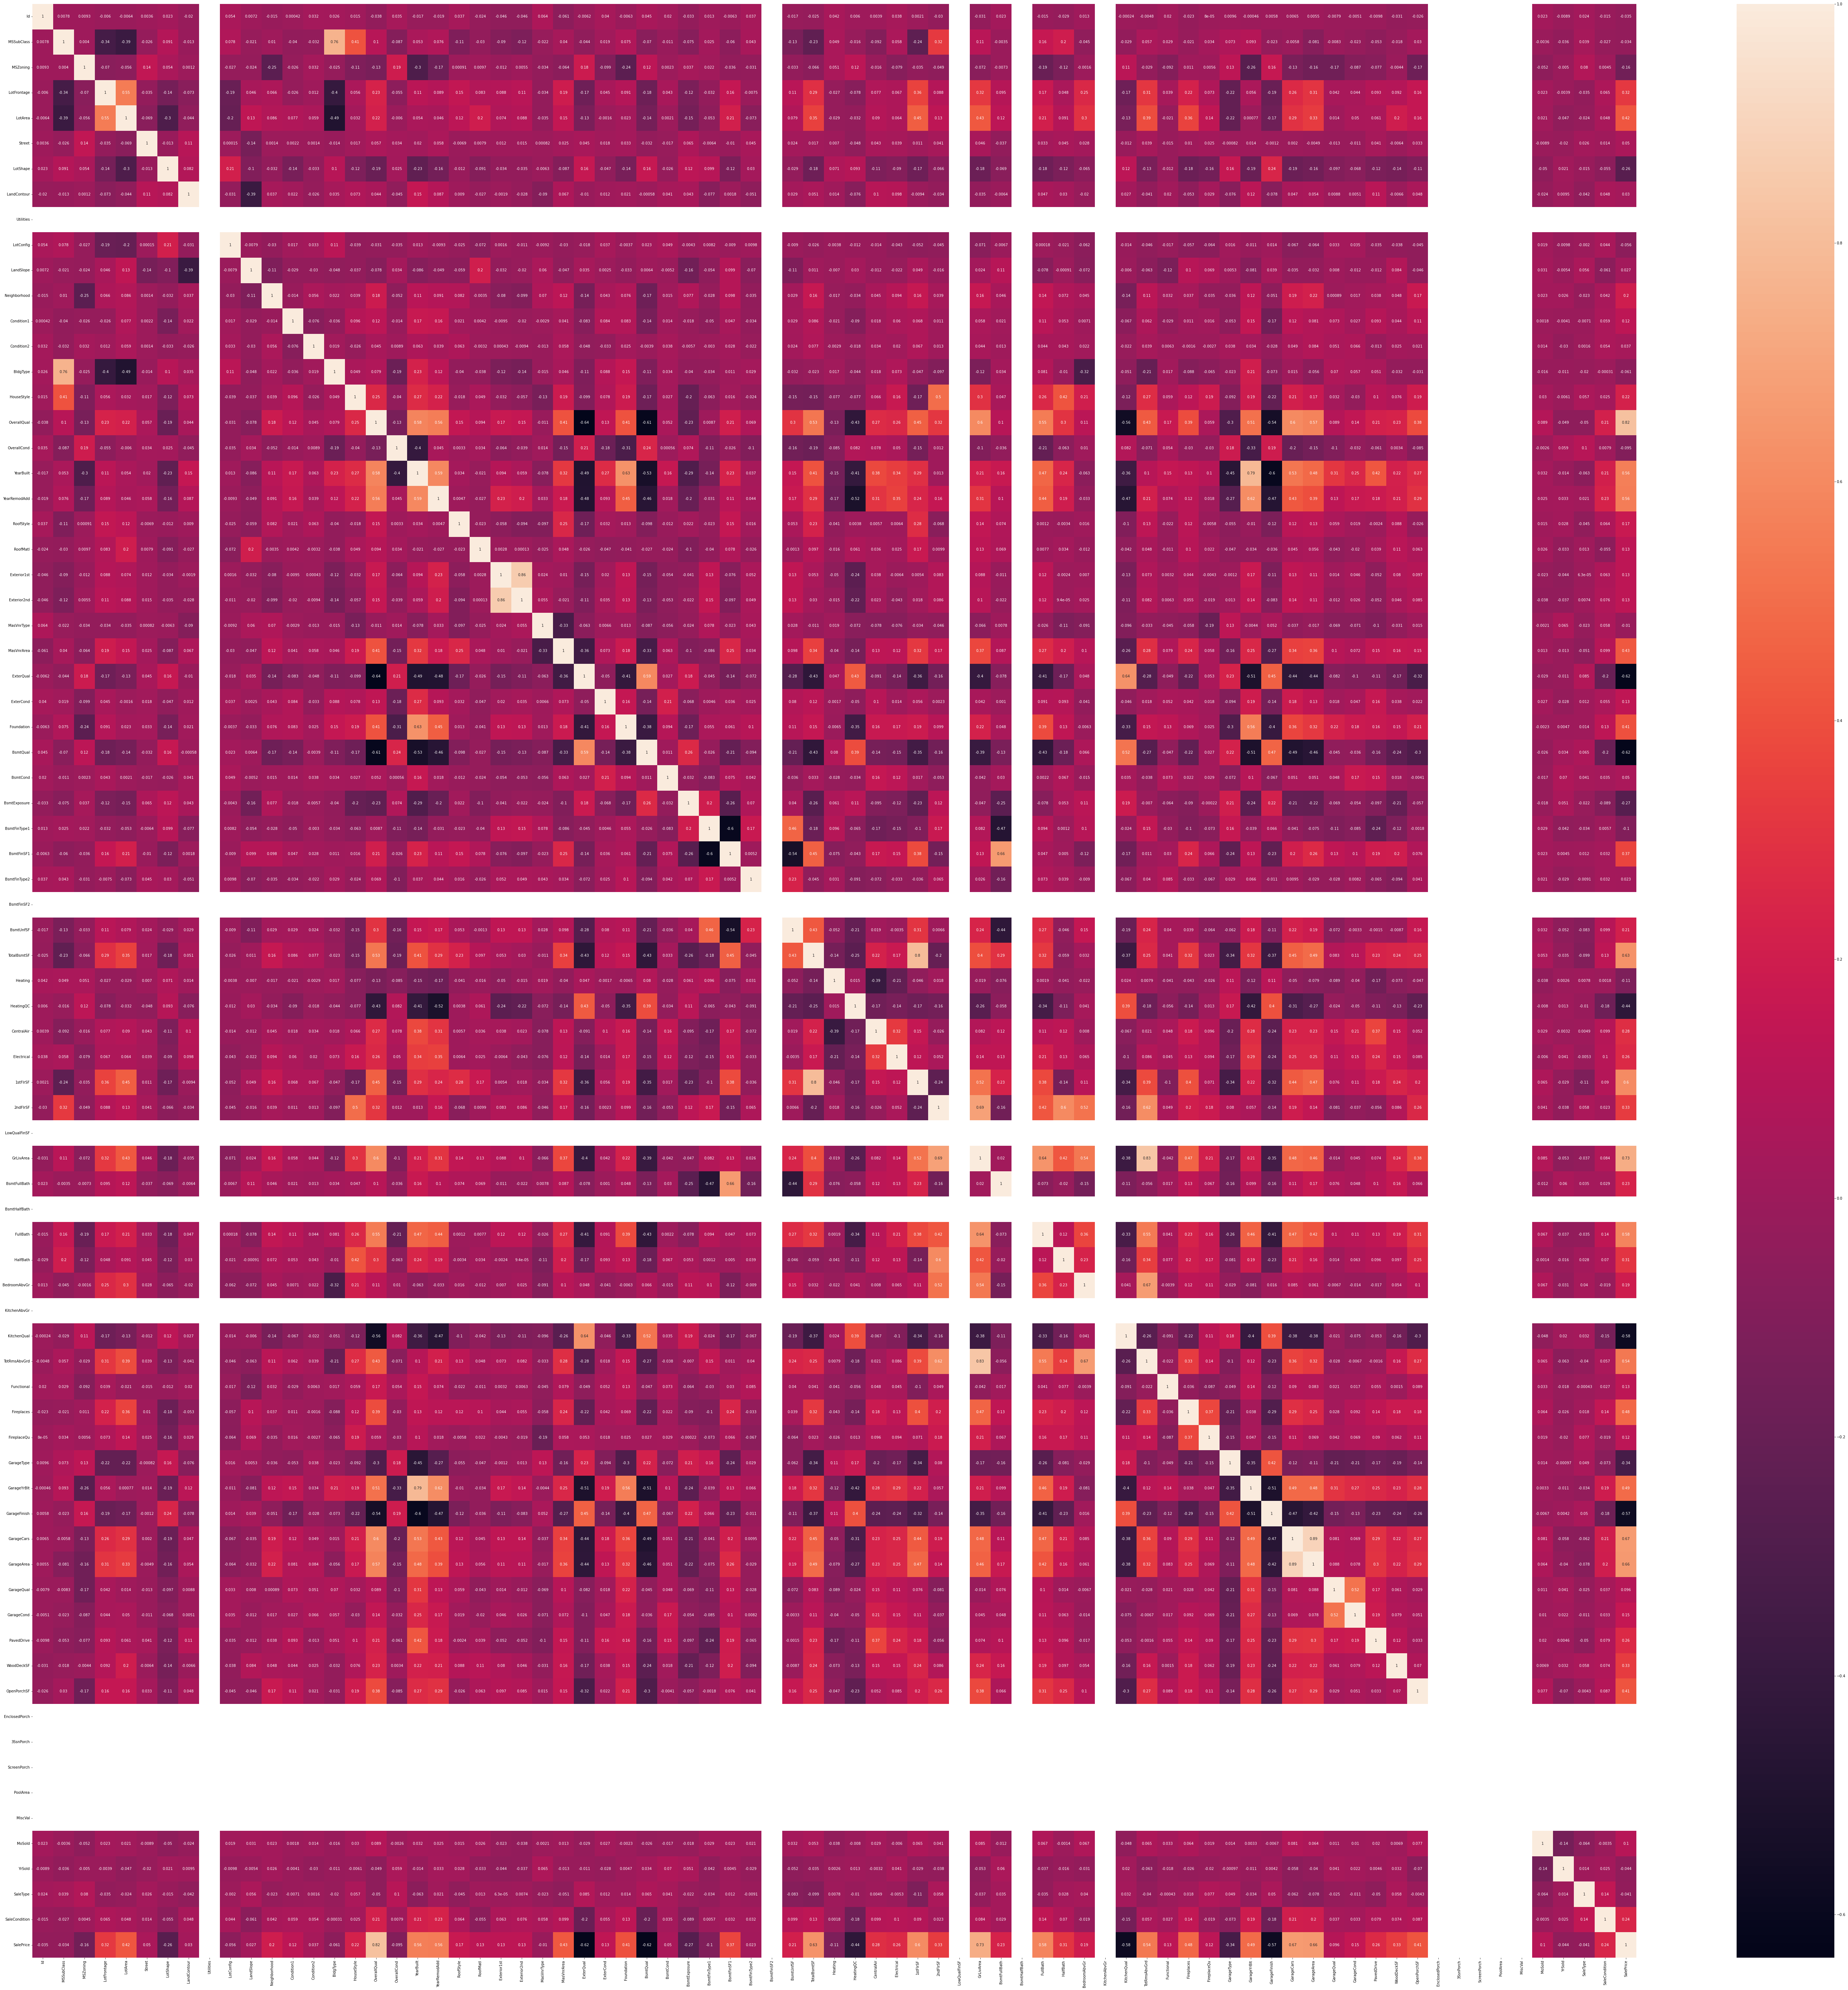

In [35]:
plt.figure(figsize=(100,100))

sns.heatmap(df.corr(), annot=True)

In [40]:
x1=df.drop("SalePrice", axis=1)
y=df["SalePrice"]

In [43]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   float64
 1   MSSubClass     1168 non-null   float64
 2   MSZoning       1168 non-null   int32  
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   float64
 5   Street         1168 non-null   int32  
 6   LotShape       1168 non-null   int32  
 7   LandContour    1168 non-null   int32  
 8   Utilities      1168 non-null   int32  
 9   LotConfig      1168 non-null   int32  
 10  LandSlope      1168 non-null   int32  
 11  Neighborhood   1168 non-null   int32  
 12  Condition1     1168 non-null   int32  
 13  Condition2     1168 non-null   int32  
 14  BldgType       1168 non-null   int32  
 15  HouseStyle     1168 non-null   int32  
 16  OverallQual    1168 non-null   float64
 17  OverallCond    1168 non-null   float64
 18  YearBuil

In [41]:
#Scaling of dataset
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x1)

In [42]:
#Finding Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns

vif


vif       features
0   1.056755             Id
1   6.328481     MSSubClass
2   1.350099       MSZoning
3   1.791346    LotFrontage
4   2.484576        LotArea
..       ...            ...
71       NaN        MiscVal
72  1.073870         MoSold
73  1.084260         YrSold
74  1.126070       SaleType
75  1.185461  SaleCondition

[76 rows x 2 columns]

In [44]:
df.skew()

Id               0.026526
MSSubClass       1.016094
MSZoning        -1.796785
LotFrontage      2.710383
LotArea          0.184194
                   ...   
MoSold           0.220979
YrSold           0.115765
SaleType        -3.660513
SaleCondition   -2.671829
SalePrice        0.786602
Length: 77, dtype: float64

In [45]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, test_size=0.25, random_state=1)

# Initialising model for prediction Linear Regression

In [46]:
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [47]:
#Checking training score

lr.score(x_train, y_train)

0.8994935825997183

In [48]:
#Checking testing score

lr.score(x_test, y_test)

0.8683239264841851

In [49]:
#plot to  visualize data
y_pred=lr.predict(x_test)
y_pred

array([218928.68469952, 153775.09825623, 184147.05389302,  69722.3364504 ,
       233060.14514455, 190215.40561442, 116398.82933215, 110475.13885399,
        92908.86615639,  77156.55788581, 225160.32501426, 198050.87793525,
       155429.00386711, 232973.75071708, 125044.2377652 , 200868.07532645,
        68575.81909364,  93185.89949023, 160857.86057689, 277156.83583569,
        69892.53821855, 143619.29579599, 168086.91453307, 212564.47721251,
       269176.09532602, 195920.87998678, 211470.62555543, 133280.38489807,
       215357.66683923,  78474.14105477, 161350.95408184, 153271.14490883,
       206225.49927903, 245385.3367235 , 228969.83034994, 133529.85520639,
       248102.72975211, 271746.76946631, 195853.72059706, 214020.9589199 ,
        82133.6754844 , 136970.45385617, 153641.00661213, 308657.32041603,
       165879.24941139, 167499.02959978, 279114.53210244, 109057.02849531,
       196931.52018377, 192416.13089856, 160777.24918469, 121738.44493983,
       182153.73447761, 1

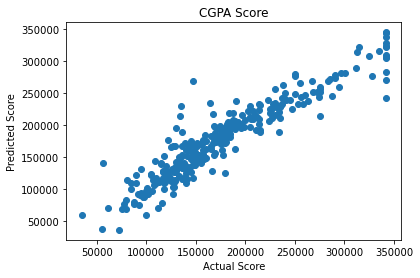

In [50]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("CGPA Score")
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [52]:
y_pred= lr.predict(x_test)

In [53]:
#Mean square error
mean_absolute_error(y_test, y_pred)

16596.183446446517

In [54]:
#MSE
mean_absolute_error(y_test, y_pred)

16596.183446446517

In [55]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

23858.070435352936

In [56]:
r2_score(y_test, y_pred)

0.8683239264841851

In [57]:
conclusion=pd.DataFrame([lr.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

0              1              2             3    \
Predicted  218928.6847  153775.098256  184147.053893   69722.33645   
Original   184000.0000  147500.000000  159000.000000  112000.00000   

                     4              5              6              7    \
Predicted  233060.145145  190215.405614  116398.829332  110475.138854   
Original   258000.000000  183200.000000  141000.000000  128000.000000   

                    8             9    ...            282            283  \
Predicted  92908.866156  77156.557886  ...  218844.674717  169998.100065   
Original   92000.000000  88000.000000  ...  187500.000000  175000.000000   

                    284            285            286            287  \
Predicted  283947.63669  202107.308457  125866.746383  242280.859094   
Original   341937.50000  196000.000000  117000.000000  341937.500000   

                     288            289            290            291  
Predicted  321751.747283  175579.816481  170672.292854  290220.135007  
Original   315000.000000  160000.000000  146500.000000  311872.000000  

[2 rows x 292 columns]

# Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [59]:
y_pred

array([198275.25 , 149882.   , 158470.   ,  97509.1  , 288772.   ,
       180210.   , 137798.4  , 135039.15 ,  89155.   , 105660.   ,
       204556.05 , 199262.5  , 158800.   , 268756.75 , 140400.   ,
       203342.95 ,  78010.   , 103782.5  , 165431.7  , 260766.3  ,
        78481.1  , 148771.85 , 179100.   , 216692.   , 282214.9  ,
       176709.25 , 211207.5  , 137100.   , 223315.75 , 106892.5  ,
       146055.   , 169965.   , 177255.   , 244949.1  , 228062.5  ,
       163265.   , 247245.   , 321658.4  , 199704.05 , 212476.2  ,
       116684.   , 139310.   , 163929.5  , 314500.275, 158593.35 ,
       135952.75 , 305400.85 , 120502.5  , 188280.   , 202305.   ,
       132565.   , 115185.   , 166437.5  , 129950.   , 120514.35 ,
       111969.15 , 312508.225, 141607.65 , 213170.   , 188293.   ,
       157250.   , 150920.   , 159898.85 , 279845.625, 151700.   ,
       130872.5  , 146627.5  , 159765.   ,  92120.   ,  83665.   ,
       274991.8  , 155307.5  , 158185.   , 317591.875, 149342.

In [60]:
#Training accuracy score

regressor.score(x_train, y_train)

0.9806934027258574

In [61]:
#Testing accuracy score
regressor.score(x_test, y_test)

0.8572177773364923

In [62]:
#Mean square error
mean_absolute_error(y_test, y_pred)

17387.08219178082

In [63]:
#MSE
mean_absolute_error(y_test, y_pred)

17387.08219178082

In [64]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

24843.853045239128

In [65]:
#R2 Score
r2_score(y_test, y_pred)

0.8572177773364923

In [66]:
conclusion=pd.DataFrame([regressor.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

0         1         2         3         4         5    \
Predicted  198275.25  149882.0  158470.0   97509.1  288772.0  180210.0   
Original   184000.00  147500.0  159000.0  112000.0  258000.0  183200.0   

                6          7        8         9    ...       282       283  \
Predicted  137798.4  135039.15  89155.0  105660.0  ...  206635.0  168375.0   
Original   141000.0  128000.00  92000.0   88000.0  ...  187500.0  175000.0   

                  284       285       286        287         288       289  \
Predicted  321243.125  184479.5  117553.8  238486.15  271734.775  172285.0   
Original   341937.500  196000.0  117000.0  341937.50  315000.000  160000.0   

                290         291  
Predicted  168446.7  274513.775  
Original   146500.0  311872.000  

[2 rows x 292 columns]

# Ada Boost Regressor

In [67]:
from sklearn.ensemble import AdaBoostRegressor

In [68]:
ada=AdaBoostRegressor()
ada.fit(x_train, y_train)

AdaBoostRegressor()

In [69]:
#Model Prediction on train data
y_pred=ada.predict(x_train)


In [70]:
accuracy=metrics.r2_score(y_train, y_pred)
print("R Square Score" , accuracy)

R Square Score 0.8946631003824975


In [71]:
#Model Prediction on test data
y_pred=ada.predict(x_test)


In [72]:
accuracy=metrics.r2_score(y_test, y_pred)
print("R Square Score" , accuracy)

R Square Score 0.8278510445669562


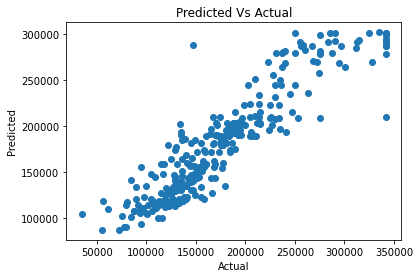

In [73]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted Vs Actual")
plt.show()

In [74]:
#Mean square error
mean_absolute_error(y_test, y_pred)

19709.297880347665

In [75]:
#MSE
mean_absolute_error(y_test, y_pred)

19709.297880347665

In [76]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

27279.35380170681

In [77]:
r2_score(y_test, y_pred)

0.8278510445669562

In [78]:
#cross validation is to check whether the model is overfitting

from sklearn.model_selection import KFold, cross_val_score

In [80]:
cv_score=cross_val_score(ada, x_scaled, y, cv=4)
cv_score

array([0.84587576, 0.84535161, 0.83351295, 0.82371406])

In [81]:
cv_mean=cv_score.mean()
cv_mean

0.8371135938020279

In [82]:
conclusion=pd.DataFrame([ada.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

0         1              2          3              4    \
Predicted  200620.37037  144139.0  172121.892157  100396.94  287752.059406   
Original   184000.00000  147500.0  159000.000000  112000.00  258000.000000   

                     5            6              7              8    \
Predicted  189444.423398  137674.6875  114631.426829  114631.426829   
Original   183200.000000  141000.0000  128000.000000   92000.000000   

                     9    ...            282            283           284  \
Predicted  107925.884892  ...  203375.055556  182463.313559  291503.91523   
Original    88000.000000  ...  187500.000000  175000.000000  341937.50000   

                    285            286            287            288  \
Predicted  190460.02963  119061.041096  210519.145652  293978.544715   
Original   196000.00000  117000.000000  341937.500000  315000.000000   

                     289            290            291  
Predicted  189577.455696  165673.141026  285156.808442  
Original   160000.000000  146500.000000  311872.000000  

[2 rows x 292 columns]

# using knn regressor

In [83]:
knn= KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [84]:
#Checking training score

knn.score(x_train, y_train)

0.8741914773614928

In [85]:
#Checking testing score

knn.score(x_test, y_test)

0.8055881360796622

In [86]:

y_pred=knn.predict(x_test)
y_pred

array([192180. , 145900. , 153890. , 111800. , 247800. , 182978. ,
       135700. , 127880. , 105280. , 113400. , 216090.2, 214630. ,
       138950. , 222600. , 147800. , 191856. ,  90800. , 113020. ,
       144586.8, 231580. ,  90160. , 125750. ,  90080. , 209297. ,
       220305.6, 192300. , 221675. , 130800. , 181120. , 104980. ,
       135731.6, 120480. , 199600. , 220595.6, 203000. , 130390. ,
       238336. , 283242.6, 203200. , 137900. , 119880. , 137751.6,
       127400. , 275495.5, 167700. , 151990. , 247630. , 128100. ,
       189280. , 205380. , 127880. , 125900. , 229938. , 136980. ,
       126300. , 123280. , 253200. , 127000. , 190980. , 183486. ,
       135980. , 154600. , 127790. , 212900. , 143880. , 127490. ,
       149092. , 167600. ,  95180. , 100701.6, 227100. , 160010. ,
       189900. , 334937.5, 127600. , 118300. , 117600. , 154000. ,
       111740. , 203967. , 128045.2, 133980. , 140276.8, 124500. ,
       198760. ,  80680. , 116990. , 199640. , 218900. , 19102

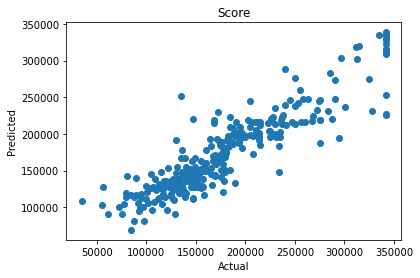

In [87]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Score")
plt.show()

In [88]:
#Mean square error
mean_absolute_error(y_test, y_pred)

20199.13835616438

In [89]:
#MSE
mean_absolute_error(y_test, y_pred)

20199.13835616438

In [90]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

28989.66952817163

In [91]:
r2_score(y_test, y_pred)

0.8055881360796622

In [96]:
# cross validation is to check whether the model is overfitting

from sklearn.model_selection import KFold, cross_val_score

In [93]:
cv_score=cross_val_score(knn, x_scaled, y, cv=4)
cv_score

array([0.83733712, 0.81550608, 0.76677559, 0.80294112])

In [94]:
cv_mean=cv_score.mean()
cv_mean

0.8056399778654945

In [95]:
conclusion=pd.DataFrame([knn.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

0         1         2         3         4         5    \
Predicted  192180.0  145900.0  153890.0  111800.0  247800.0  182978.0   
Original   184000.0  147500.0  159000.0  112000.0  258000.0  183200.0   

                6         7         8         9    ...       282       283  \
Predicted  135700.0  127880.0  105280.0  113400.0  ...  208000.0  140700.0   
Original   141000.0  128000.0   92000.0   88000.0  ...  187500.0  175000.0   

                284       285       286       287       288       289  \
Predicted  309550.0  195040.0  125400.0  225100.0  319462.5  177820.0   
Original   341937.5  196000.0  117000.0  341937.5  315000.0  160000.0   

                290       291  
Predicted  163260.0  318579.8  
Original   146500.0  311872.0  

[2 rows x 292 columns]

# Final Model Saving & Prediction

In [97]:
#Saving the model in local file system 
import pickle

pickle.dump(lr, open("regressor", "wb"))

In [98]:
loaded_model=pickle.load(open("regressor", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

86.8323926484185


In [99]:
conclusion=pd.DataFrame([lr.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

0              1              2             3    \
Predicted  218928.6847  153775.098256  184147.053893   69722.33645   
Original   184000.0000  147500.000000  159000.000000  112000.00000   

                     4              5              6              7    \
Predicted  233060.145145  190215.405614  116398.829332  110475.138854   
Original   258000.000000  183200.000000  141000.000000  128000.000000   

                    8             9    ...            282            283  \
Predicted  92908.866156  77156.557886  ...  218844.674717  169998.100065   
Original   92000.000000  88000.000000  ...  187500.000000  175000.000000   

                    284            285            286            287  \
Predicted  283947.63669  202107.308457  125866.746383  242280.859094   
Original   341937.50000  196000.000000  117000.000000  341937.500000   

                     288            289            290            291  
Predicted  321751.747283  175579.816481  170672.292854  290220.135007  
Original   315000.000000  160000.000000  146500.000000  311872.000000  

[2 rows x 292 columns]